In [50]:
# default_exp covid

In [51]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
#export
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import matplotlib.pyplot as pyplot
import numpy as np
import calendar
import seaborn as sns
import os
from datetime import datetime, timedelta

In [53]:
monthLoc = mdates.MonthLocator()  # every month
month_fm = mdates.DateFormatter('%b')
figSize = (15,5)

## Data

In [54]:
def saveDF(df,root,name,ext="csv"):
    directory = os.path.join("data",root)
    if not os.path.exists(directory):
        os.makedirs(directory)
    df.to_csv(os.path.join(directory, name + "." +  (datetime.now() - timedelta(days=1)).strftime("%Y.%m.%d") + "." + ext))
    return df

def getRemoteDF(url,name,ext="csv"):
    s=requests.get(url).content
    df = pd.read_csv(io.StringIO(s.decode('utf-8')))
    saveDF(df=df,root=name,name=name,ext=ext)
    return df

In [55]:
#hide
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid=getRemoteDF(url,name="covid",ext="csv")
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [56]:
covid['date']= pd.to_datetime(covid['date']) 
covid.index = covid['date']
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24443 entries, 2019-12-31 to 2020-03-10
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         24379 non-null  object        
 1   continent                        24209 non-null  object        
 2   location                         24443 non-null  object        
 3   date                             24443 non-null  datetime64[ns]
 4   total_cases                      24225 non-null  float64       
 5   new_cases                        24225 non-null  float64       
 6   total_deaths                     24225 non-null  float64       
 7   new_deaths                       24225 non-null  float64       
 8   total_cases_per_million          24161 non-null  float64       
 9   new_cases_per_million            24161 non-null  float64       
 10  total_deaths_per_million         24161 no

In [57]:
usa = covid[covid["iso_code"] == "USA"]
usa.tail(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2020-06-13,USA,North America,United States,2020-06-13,2048986.0,25639.0,114669.0,849.0,6190.241,77.459,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2020-06-14,USA,North America,United States,2020-06-14,2074526.0,25540.0,115436.0,767.0,6267.400,77.160,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2020-06-15,USA,North America,United States,2020-06-15,2094069.0,19543.0,115732.0,296.0,6326.442,59.042,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2020-06-16,USA,North America,United States,2020-06-16,2114026.0,19957.0,116127.0,395.0,6386.734,60.293,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
2020-06-17,USA,North America,United States,2020-06-17,2137731.0,23705.0,116963.0,836.0,6458.350,71.616,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86


In [58]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 170 entries, 2019-12-31 to 2020-06-17
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         170 non-null    object        
 1   continent                        170 non-null    object        
 2   location                         170 non-null    object        
 3   date                             170 non-null    datetime64[ns]
 4   total_cases                      170 non-null    float64       
 5   new_cases                        170 non-null    float64       
 6   total_deaths                     170 non-null    float64       
 7   new_deaths                       170 non-null    float64       
 8   total_cases_per_million          170 non-null    float64       
 9   new_cases_per_million            170 non-null    float64       
 10  total_deaths_per_million         170 non-nu

### Counties

In [59]:
surl = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
counties=getRemoteDF(surl,name="counties",ext="csv")
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [60]:
counties.index = pd.to_datetime(counties['date'])
counties.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242827 entries, 2020-01-21 to 2020-06-16
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    242827 non-null  object 
 1   county  242827 non-null  object 
 2   state   242827 non-null  object 
 3   fips    240275 non-null  float64
 4   cases   242827 non-null  int64  
 5   deaths  242827 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 13.0+ MB


### Mobility
https://www.apple.com/covid19/mobility

In [61]:
mobility=pd.read_csv("data/applemobilitytrends-2020-06-10.csv")
mobility.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,90.62,88.33,89.97,84.30,93.46,102.16,111.59,93.78,95.51,92.69
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,84.18,93.86,87.72,94.75,83.24,81.96,87.25,87.38,90.83,91.09
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,39.64,41.88,43.77,45.84,52.26,47.48,27.32,44.06,47.00,48.10
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,29.50,31.25,30.65,31.93,37.34,33.53,19.60,34.36,35.81,36.25
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,80.87,84.72,88.62,100.24,104.34,83.85,85.16,86.92,88.07,90.36


### The Atlantic

In [62]:
surl = "https://covidtracking.com/api/v1/us/daily.csv"
theatlantic = getRemoteDF(surl,name="theAtlantic",ext="csv")
theatlantic.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200616,56,2127047,22322260.0,1604.0,28028.0,226926.0,5564.0,9590.0,2594.0,...,2020-06-16T00:00:00Z,24450911,24449307,24449307,713,1356,441217,23498,464715,b76c38c5b2569c09d84b6559091245c2d92f6e3a
1,20200615,56,2103549,21881043.0,1619.0,27115.0,225570.0,5695.0,9516.0,2636.0,...,2020-06-15T00:00:00Z,23986211,23984592,23984592,375,509,430967,18521,449488,1d6b3f792d9ad6ab553ce0b8f358d96d70333629
2,20200614,56,2085028,21450076.0,1672.0,27247.0,225061.0,5743.0,9466.0,2716.0,...,2020-06-14T00:00:00Z,23536776,23535104,23535104,358,641,463596,21486,485082,168319cea57492b92c3e16221430b3b93c7cb866
3,20200613,56,2063542,20986480.0,1698.0,27902.0,224420.0,5878.0,9430.0,2726.0,...,2020-06-13T00:00:00Z,23051720,23050022,23050022,695,1139,494566,25344,519910,4759fa308f4ca5a3140d150554b425fa6e2268a6
4,20200612,56,2038198,20491914.0,1783.0,28524.0,223281.0,6012.0,9373.0,2734.0,...,2020-06-12T00:00:00Z,22531895,22530112,22530112,751,1298,560100,23318,583418,fd83f7e9af4a8dd9f20c76cd2ffaa46b481acf5d


In [63]:
theatlantic['dated']= pd.to_datetime(theatlantic['date'],infer_datetime_format=True,format='%Y%m%d') 
theatlantic.index = theatlantic['dated']

In [64]:
theatlantic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 2020-06-16 to 2020-01-22
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      147 non-null    int64         
 1   states                    147 non-null    int64         
 2   positive                  147 non-null    int64         
 3   negative                  109 non-null    float64       
 4   pending                   105 non-null    float64       
 5   hospitalizedCurrently     92 non-null     float64       
 6   hospitalizedCumulative    88 non-null     float64       
 7   inIcuCurrently            83 non-null     float64       
 8   inIcuCumulative           84 non-null     float64       
 9   onVentilatorCurrently     84 non-null     float64       
 10  onVentilatorCumulative    77 non-null     float64       
 11  recovered                 84 non-null     float64       
 12  dat

In [65]:
 (datetime.now() - timedelta(days=1)).strftime("%Y.%m.%d")

'2020.06.16'

In [66]:
surl = "https://data.sfgov.org/resource/favi-qct6.csv"
sanFranZip= getRemoteDF(surl,name="sanFranZip",ext="csv")
sanFranZip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data_as_of           27 non-null     object 
 1   objectid             27 non-null     int64  
 2   zip_code             27 non-null     int64  
 3   count                23 non-null     float64
 4   acs_population       27 non-null     int64  
 5   rate                 23 non-null     float64
 6   rate_groups          27 non-null     object 
 7   city_count           27 non-null     int64  
 8   city_acs_population  27 non-null     int64  
 9   city_rate            27 non-null     float64
 10  rate_diff            23 non-null     float64
 11  multipolygon         27 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ KB


In [67]:
home = sanFranZip[sanFranZip.zip_code == 94123]
home = home.drop('multipolygon',axis=1)
saveDF(home,"sanFranZip",name="home",ext="csv")

,data_as_of,objectid,zip_code,count,acs_population,rate,rate_groups,city_count,city_acs_population,city_rate,rate_diff
1,2020-06-10T00:00:00.000,4,94123,28.0,25461,10.997211,10-15,2320,864263,26.843681,-15.846469


In [68]:
sanFranZip.zip_code.unique()

array([94121, 94123, 94158, 94107, 94118, 94105, 94114, 94133, 94132,
       94112, 94117, 94127, 94102, 94124, 94109, 94134, 94129, 94103,
       94108, 94115, 94130, 94110, 94122, 94131, 94111, 94104, 94116])

In [69]:
surl = "https://data.sfgov.org/resource/tvq9-ec9w.csv"
sfCounty = getRemoteDF(surl,name="sfCounty",ext="csv")
sfCounty.tail(20)

,specimen_collection_date,case_disposition,transmission_category,case_count,last_updated_at
267,2020-06-08T00:00:00.000,Confirmed,Unknown,1,2020-06-16T16:15:35.440
268,2020-06-08T00:00:00.000,Confirmed,Community,17,2020-06-16T16:15:35.440
269,2020-06-08T00:00:00.000,Confirmed,From Contact,18,2020-06-16T16:15:35.440
270,2020-06-09T00:00:00.000,Confirmed,From Contact,12,2020-06-16T16:15:35.440
271,2020-06-09T00:00:00.000,Confirmed,Community,20,2020-06-16T16:15:35.440
272,2020-06-09T00:00:00.000,Confirmed,Unknown,1,2020-06-16T16:15:35.440
273,2020-06-10T00:00:00.000,Confirmed,Community,11,2020-06-16T16:15:35.440
274,2020-06-10T00:00:00.000,Confirmed,From Contact,4,2020-06-16T16:15:35.440
275,2020-06-11T00:00:00.000,Confirmed,From Contact,9,2020-06-16T16:15:35.440
276,2020-06-11T00:00:00.000,Confirmed,Community,7,2020-06-16T16:15:35.440


## manipulation

In [70]:
startDate = datetime(year=2020,month=1,day=1)
endDate = datetime.today()

def keyFromDate(d):
    return str(d.year) + "-" + d.strftime('%m-%d')
    return str(d.year) + "-" + str( d.month) + "-" + str(d.day)

def processSample(x):
    arr = []
    currentDate = startDate
    delta = timedelta(days=1)
    while keyFromDate(currentDate) !=  keyFromDate(endDate):
        key =  keyFromDate(currentDate)
        #print(key)
        if  key in x:
            arr.append(x[key])
        else:
            arr.append(np.nan)
        currentDate += delta
    return arr #{x['transportation_type']:arr}

def processTable(y,keyName = 'transportation_type'):
    ret = {}
    dateRange = []
    dateKeys = []
    currentDate = startDate
    delta = timedelta(days=1)
    while keyFromDate(currentDate) !=  keyFromDate(endDate):
        key =  keyFromDate(currentDate)
        dateKeys.append(calendar.day_name[currentDate.weekday()])
        dateRange.append(pd.Timestamp(currentDate))
        currentDate += delta
    ret = {"keys": dateKeys,"date":dateRange}
    for x in y:
        ret[x[keyName]] = processSample(x)
    return pd.DataFrame.from_dict(ret)

In [71]:
SanFranMob = processTable(mobility[mobility["region"] == "San Francisco - Bay Area"].to_dict('records'))
SanFranMob.to_csv("SanFranMob.csv")
SanFranMob.index = SanFranMob["date"]
SanFranMob.tail(5)

,keys,date,driving,transit,walking
date,,,,,
2020-06-12,Friday,2020-06-12,NaN,NaN,NaN
2020-06-13,Saturday,2020-06-13,NaN,NaN,NaN
2020-06-14,Sunday,2020-06-14,NaN,NaN,NaN
2020-06-15,Monday,2020-06-15,NaN,NaN,NaN
2020-06-16,Tuesday,2020-06-16,NaN,NaN,NaN


In [72]:
yesterday = (datetime.now() - timedelta(days=1)).strftime("%A")
yesterday

'Tuesday'

In [73]:
counties.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242827 entries, 2020-01-21 to 2020-06-16
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    242827 non-null  object 
 1   county  242827 non-null  object 
 2   state   242827 non-null  object 
 3   fips    240275 non-null  float64
 4   cases   242827 non-null  int64  
 5   deaths  242827 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 13.0+ MB


In [74]:
def lastWeek(data,field):
    yesterday = (datetime.now() - timedelta(days=2)).strftime("%A")
    worst = data[data.index.strftime("%A") == yesterday]
    worst = worst[["state","county",field]]
    worst = worst.sort_values(["state","county"])
    worst["diff"] = worst[field].diff()
    return worst[worst.index >= (datetime.now() - timedelta(days=8)) ]
    
w = lastWeek(counties,"cases")
w = w.sort_values("diff",ascending=False)
w.head(30)

,state,county,cases,diff
date,,,,
2020-06-15,California,Los Angeles,73791,9147.0
2020-06-15,Arizona,Maricopa,19372,5369.0
2020-06-15,New York,New York City,215011,2889.0
2020-06-15,Florida,Miami-Dade,22196,2441.0
2020-06-15,Illinois,Cook,85184,2365.0
2020-06-15,Texas,Harris,17282,2364.0
2020-06-15,Texas,Dallas,14537,2190.0
2020-06-15,California,Riverside,11285,2079.0
2020-06-15,Florida,Palm Beach,9013,1686.0


In [75]:
w = lastWeek(counties,"deaths")
w = w.sort_values("diff",ascending=False)
w.head(20)

,state,county,deaths,diff
date,,,,
2020-06-15,California,Los Angeles,2926,271.0
2020-06-15,Illinois,Cook,4206,247.0
2020-06-15,New York,New York City,21600,244.0
2020-06-15,Pennsylvania,Philadelphia,1509,88.0
2020-06-15,Arizona,Maricopa,557,66.0
2020-06-15,Florida,Miami-Dade,826,59.0
2020-06-15,Florida,Palm Beach,429,56.0
2020-06-15,Massachusetts,Middlesex,1763,52.0
2020-06-15,Rhode Island,Unknown,54,52.0


In [76]:
def poscalc(row):
    if row.totalTestResultsIncrease == 0:
        return 0
    return row.positiveIncrease / row.totalTestResultsIncrease 
theatlantic["posRate"] =  theatlantic.apply(lambda row: poscalc(row) , axis = 1) 

## plotting

In [77]:
def myplot(data,ax=None):
    monthLoc = mdates.MonthLocator()  # every month
    month_fm = mdates.DateFormatter('%b')
    plt.figure(figsize=(15,5))
    if ax == None:
        ax = sns.lineplot(data=data, palette="tab10", markers=True, linewidth = 0.5) #, linewidth=2.5)  
    else:
        ax = sns.lineplot(data=data, markers=True, color="g", ax=ax)
    ax.xaxis.set_major_locator(monthLoc)
    ax.xaxis.set_major_formatter(month_fm)
    ax.xaxis.set_minor_locator(monthLoc)
    ax.set_xlabel("Date")
    return ax


def myscatter(data,ax=None):
    monthLoc = mdates.MonthLocator()  # every month
    month_fm = mdates.DateFormatter('%b')
    plt.figure(figsize=(15,5))
    if ax == None:
        data.dropna()
        ax = sns.scatterplot(data=data, palette="tab10") #, linewidth=2.5)  
    else:
        ax = sns.lineplot(data=data, color="g", ax=ax)
    #ax.xaxis.set_major_locator(monthLoc)
    #ax.xaxis.set_major_formatter(month_fm)
    #ax.xaxis.set_minor_locator(monthLoc)
    #ax.set_xlabel("Date")
    return ax

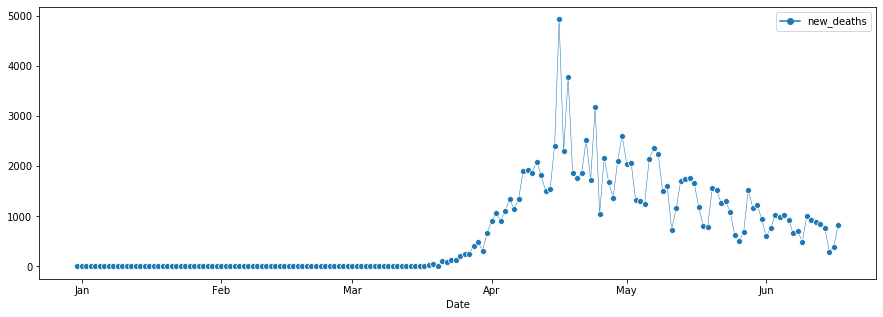

In [78]:
temp = myplot(usa[["new_deaths"]])

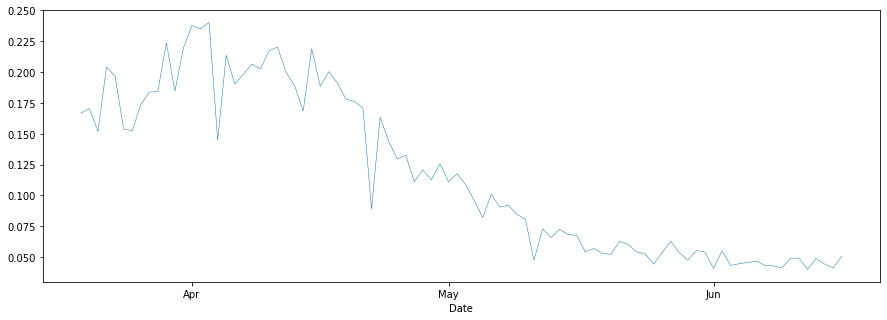

In [79]:
temp = myplot(theatlantic["posRate"].head(90))

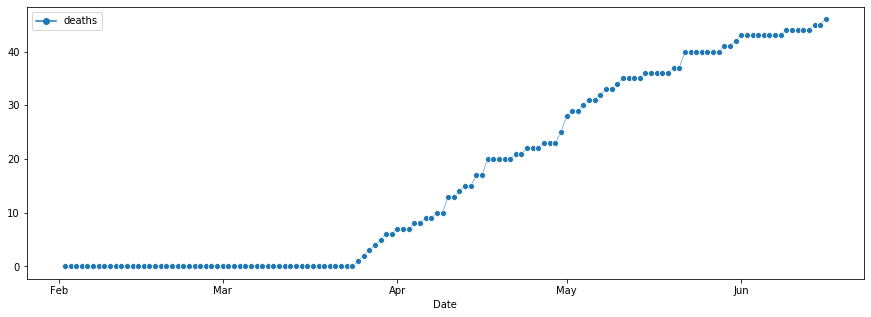

In [80]:
sanfran = counties[counties["county"] == "San Francisco"]
temp = myplot(sanfran[["deaths"]])

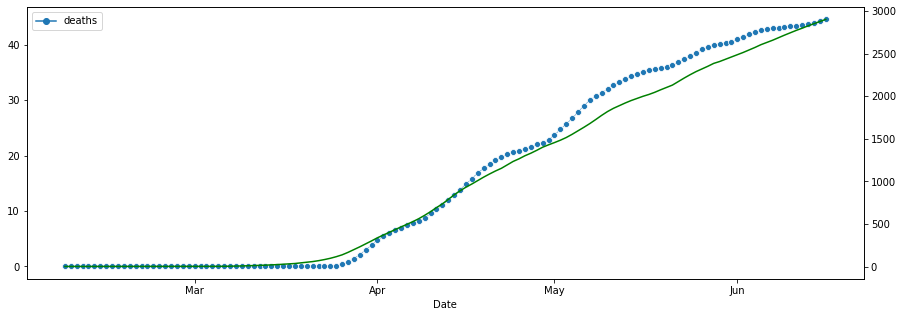

<Figure size 1080x360 with 0 Axes>

In [81]:
sfrolling = sanfran[["deaths","cases"]].rolling(7).mean()
temp = myplot(sfrolling[["deaths"]])
ax2 = plt.twinx()
temp = myplot(sfrolling.cases, ax=ax2)

In [82]:
sanfran.tail(15)

,date,county,state,fips,cases,deaths
date,,,,,,
2020-06-02,2020-06-02,San Francisco,California,6075.0,2590,43
2020-06-03,2020-06-03,San Francisco,California,6075.0,2616,43
2020-06-04,2020-06-04,San Francisco,California,6075.0,2647,43
2020-06-05,2020-06-05,San Francisco,California,6075.0,2701,43
2020-06-06,2020-06-06,San Francisco,California,6075.0,2715,43
2020-06-07,2020-06-07,San Francisco,California,6075.0,2750,43
2020-06-08,2020-06-08,San Francisco,California,6075.0,2782,43
2020-06-09,2020-06-09,San Francisco,California,6075.0,2796,44
2020-06-10,2020-06-10,San Francisco,California,6075.0,2812,44


In [83]:
sanfran.to_csv("SanFran.csv")

In [84]:
def isCounty(x):
    return x.country == "United States" and x.geo_type == 'county' # and x.transportation_type =='driving'

def countyMobile(x, state = "California"): 
    myreg = [y + " County" for y in x]
    mobility["use"] =  mobility.apply(lambda row: isCounty(row) and row["sub-region"] == state and row.region in myreg  , axis = 1) 
    good = mobility[mobility.use]
    records = good.to_dict('records')
    if len(records) < 1 :
        return  plt.plot()
    mob =  processTable(records,keyName="region")
    mob.index = mob["date"]
    ax = myplot(mob[myreg].rolling(7).mean())
    ax.set_title('Driving')
    return ax

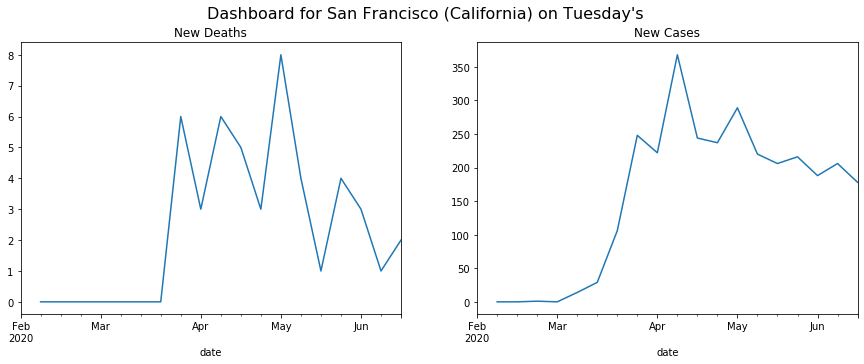

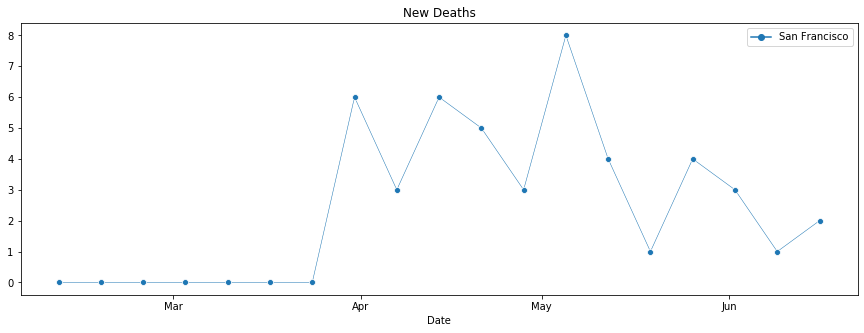

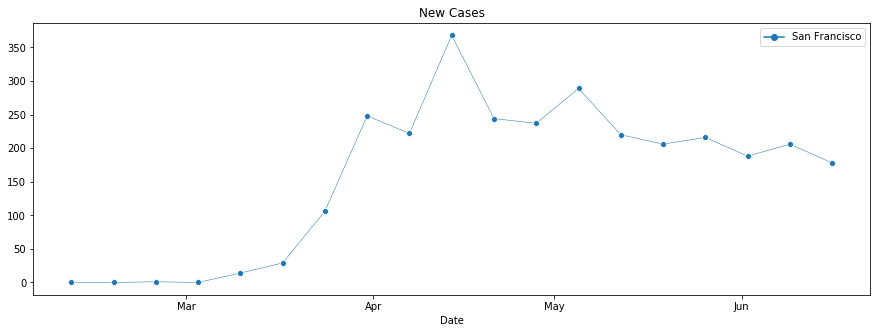

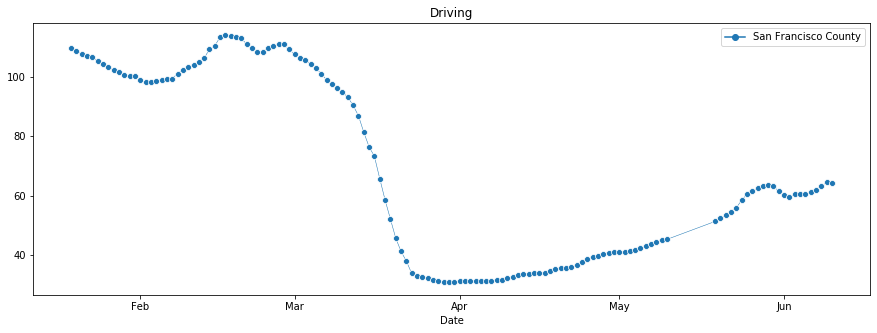

In [85]:
def countyDashBoard(myreg, state = "California"):
    myreg.sort()
    yesterday = (datetime.now() - timedelta(days=1)).strftime("%A")
    counties["use"] =  counties.apply(lambda row: row.county in myreg and row.state == state , axis = 1) 
    good = counties[counties.use]
    good = good[good.index.strftime("%A") == yesterday  ]
    combine = good.groupby([good.index]).sum()
    #plt.title('A sine wave with a gap of NaNs between 0.4 and 0.6')
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
    ax = combine.deaths.diff().plot(ax=ax1 )
    fig.suptitle("Dashboard for " + ", ".join(myreg) + " (" + state + ") on " + yesterday +"'s", fontsize=16)
    ax1.set_title('New Deaths')
    ax = combine.cases.diff().plot(ax=ax2 )
    ax2.set_title('New Cases')
    ax= myplot(good.pivot( columns='county', values='deaths').diff())
    ax.set_title('New Deaths')
    ax= myplot(good.pivot( columns='county', values='cases').diff())
    ax.set_title('New Cases')
    ax = countyMobile(myreg,state=state)
    

countyDashBoard(["San Francisco"])

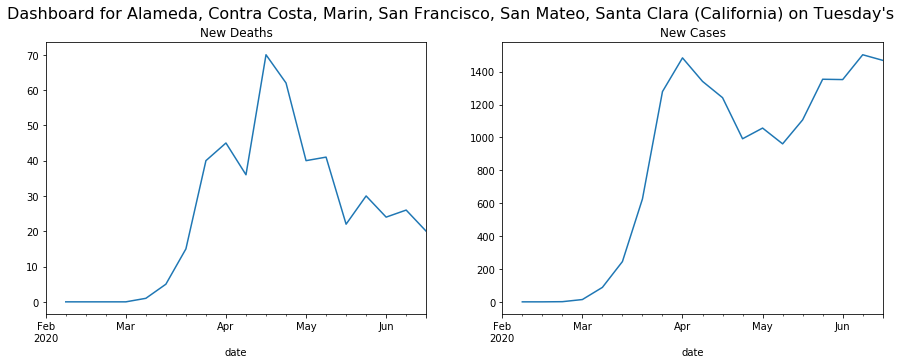

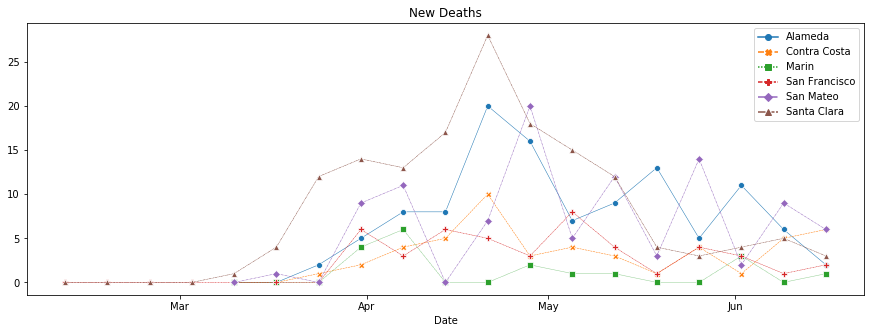

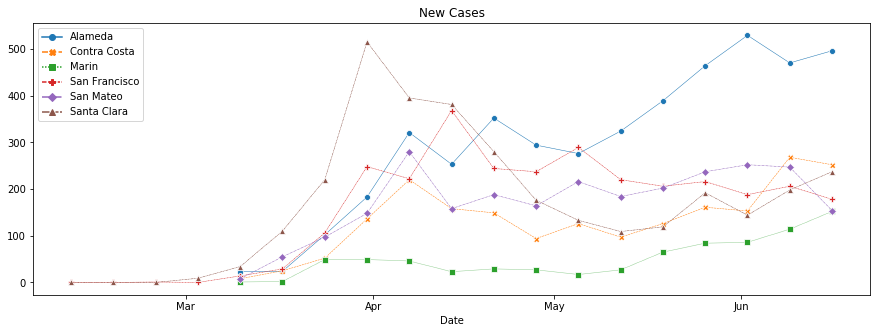

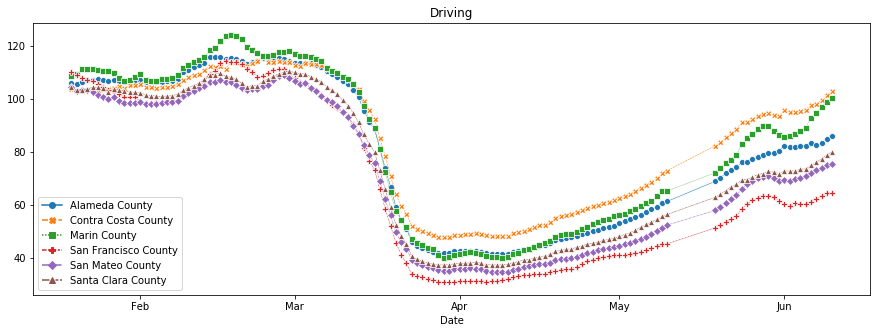

In [86]:
countyDashBoard(["San Francisco","Marin","San Mateo","Alameda","Contra Costa","Santa Clara"])

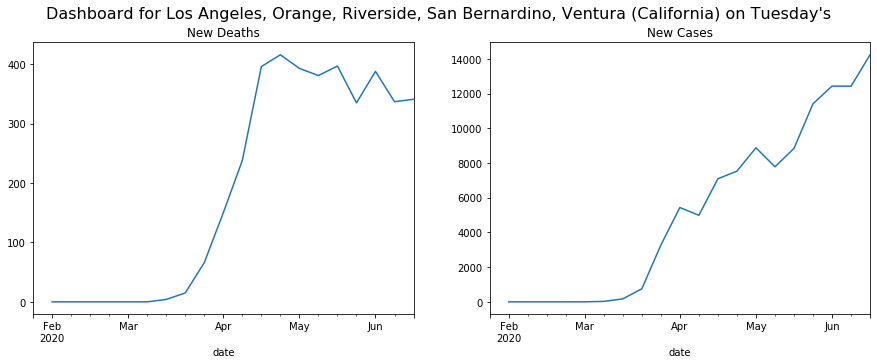

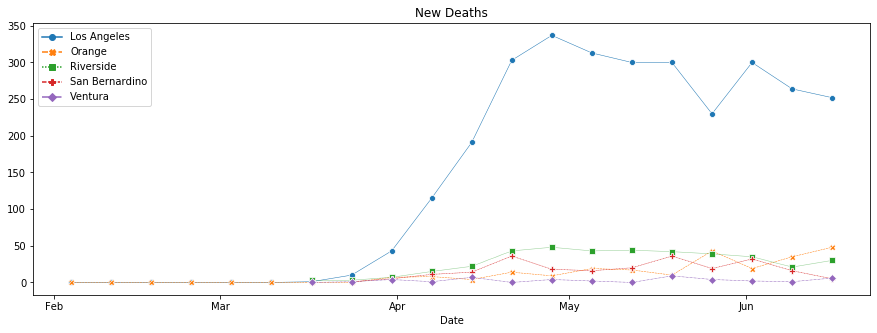

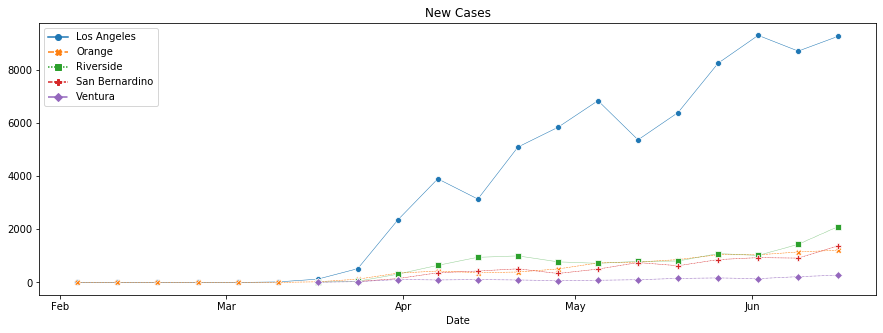

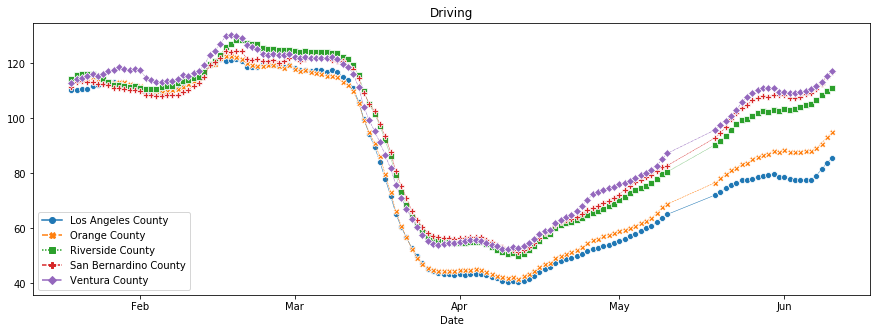

In [87]:
countyDashBoard(["Orange","Ventura","San Bernardino","Los Angeles","Riverside"])

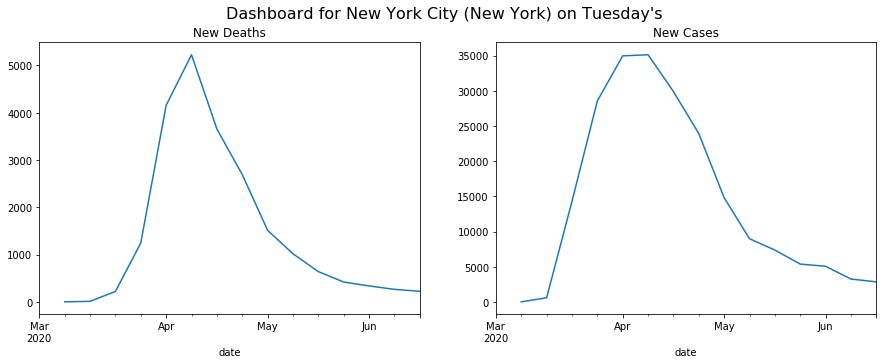

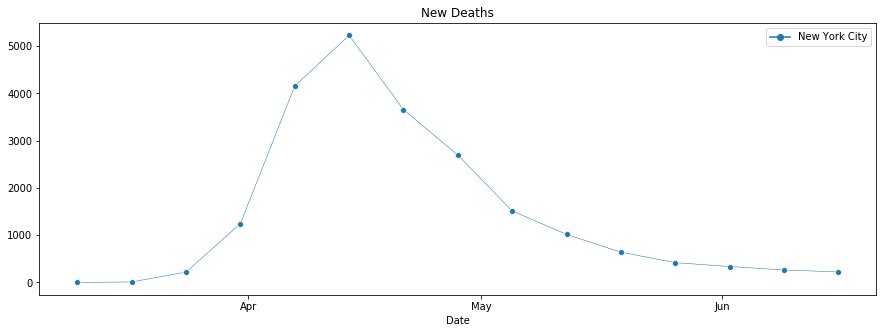

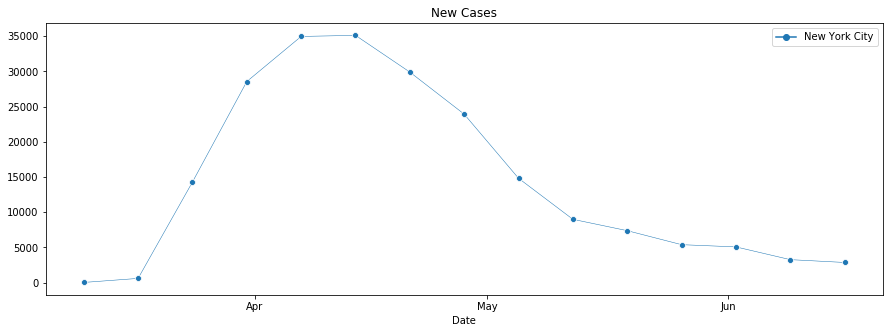

In [88]:
countyDashBoard(["New York City"],state="New York")
#counties[counties.state == "New York"]

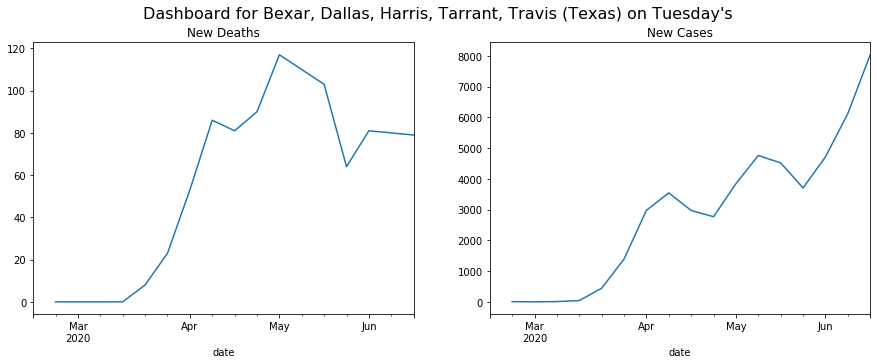

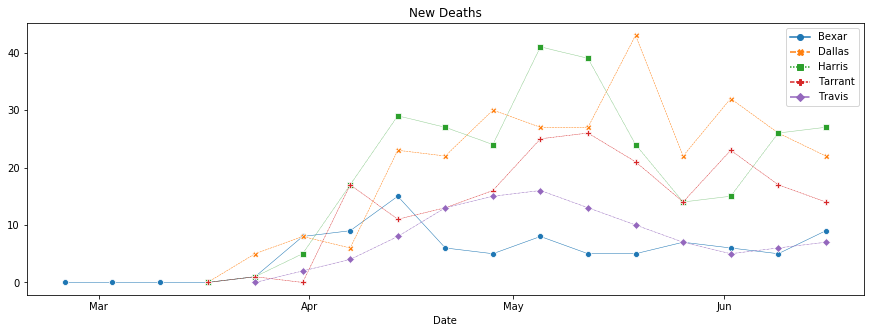

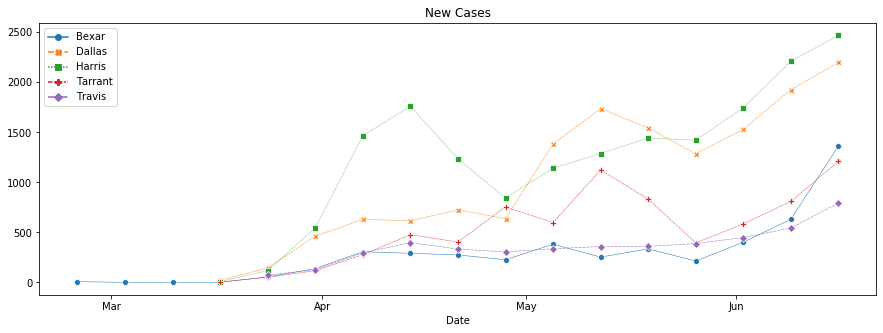

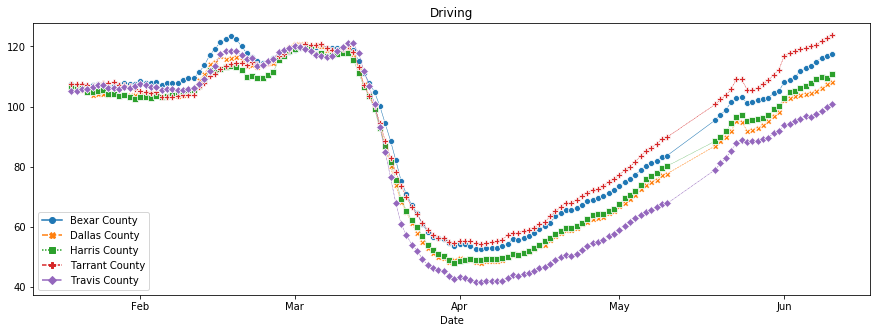

In [89]:
countyDashBoard(["Harris","Dallas","Tarrant","Bexar","Travis"],state="Texas")

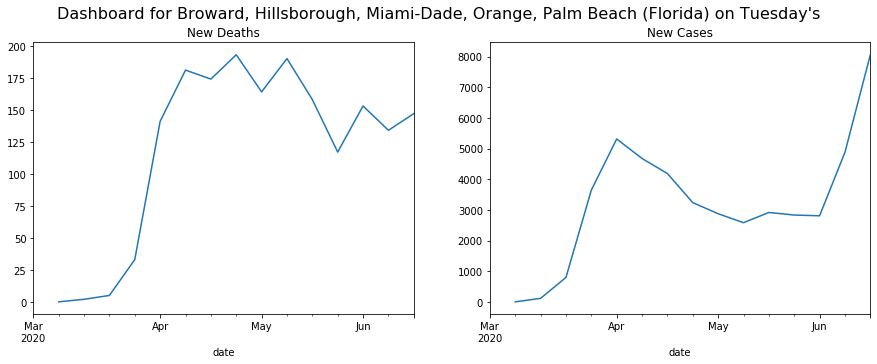

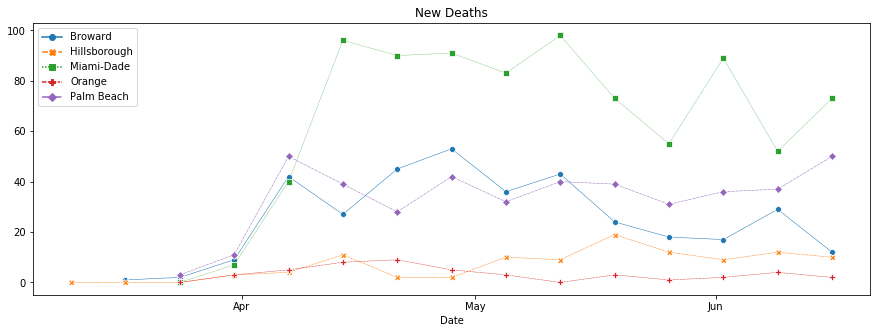

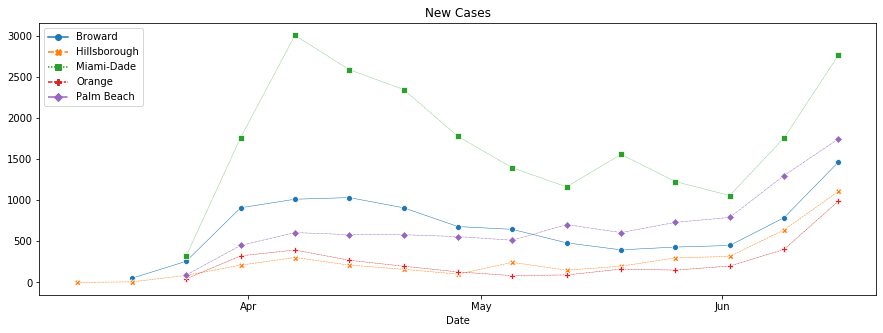

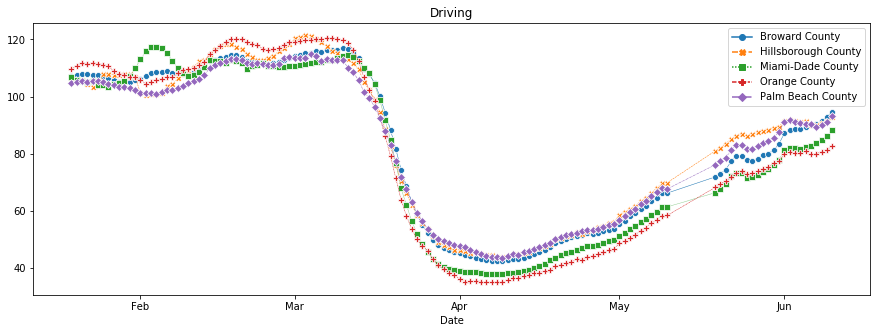

In [90]:
countyDashBoard(["Miami-Dade","Broward","Palm Beach","Hillsborough","Orange"],state="Florida")

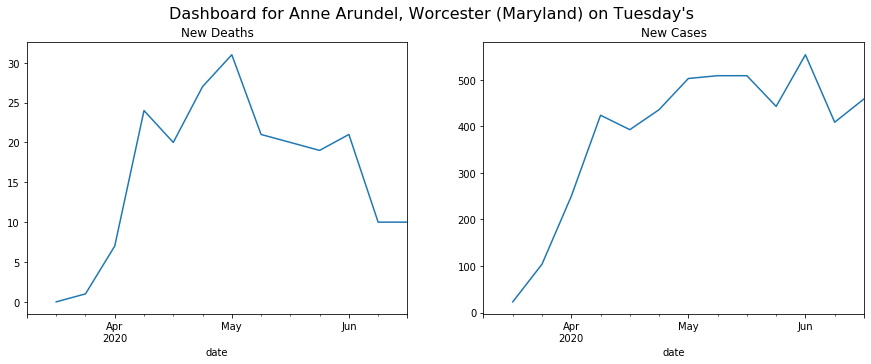

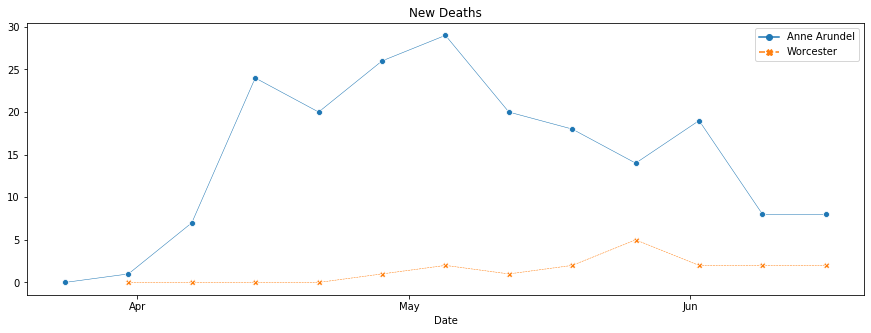

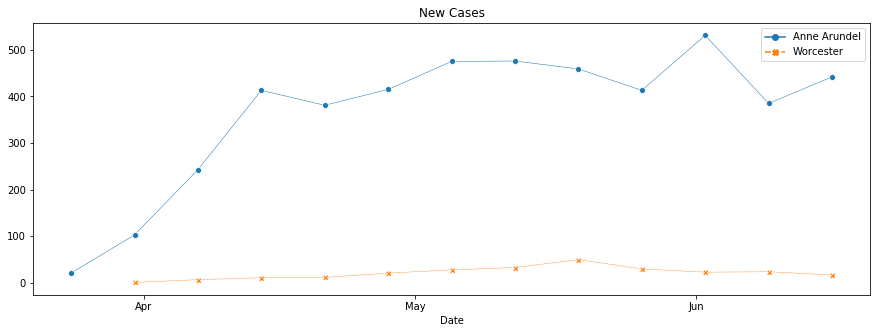

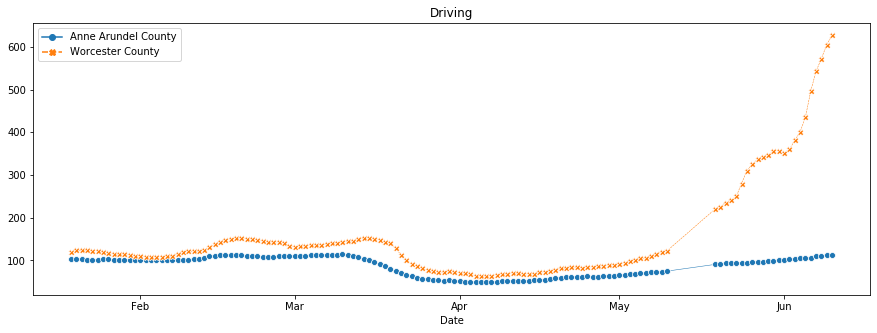

In [91]:
countyDashBoard(["Anne Arundel","Worcester"],state="Maryland")

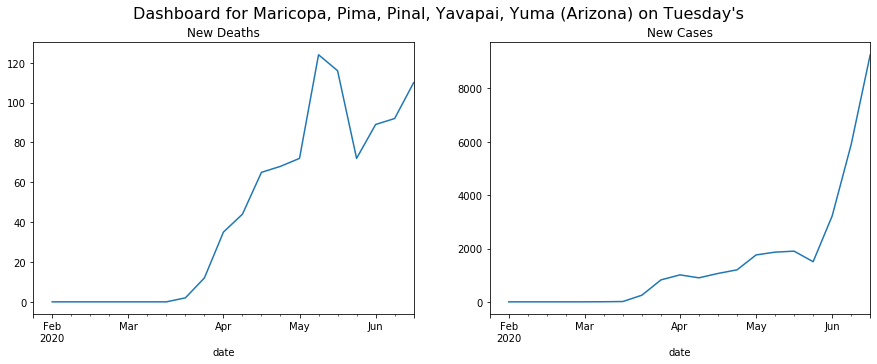

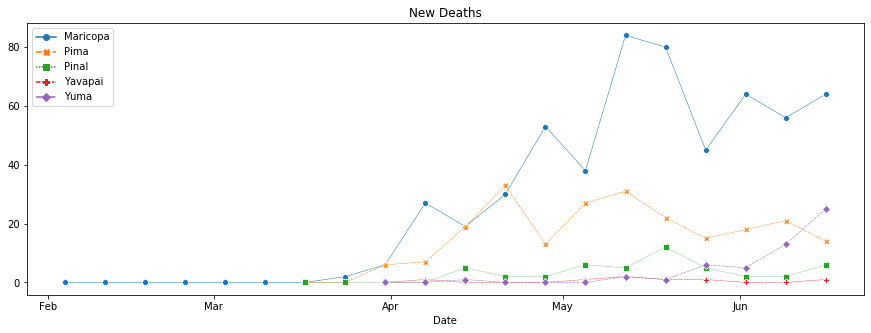

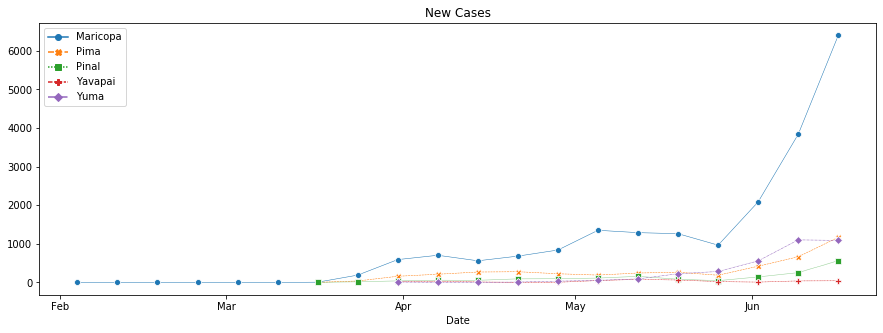

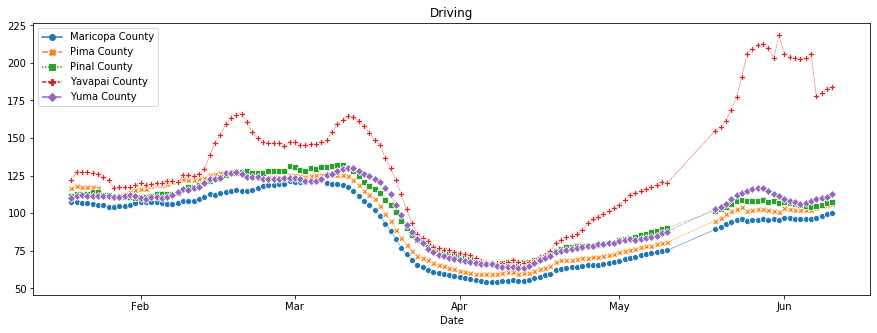

In [92]:
countyDashBoard(["Maricopa","Pima","Pinal","Yavapai","Yuma"],state="Arizona")

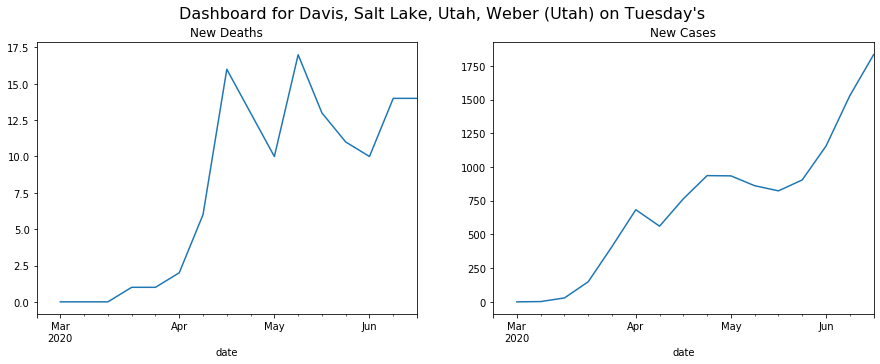

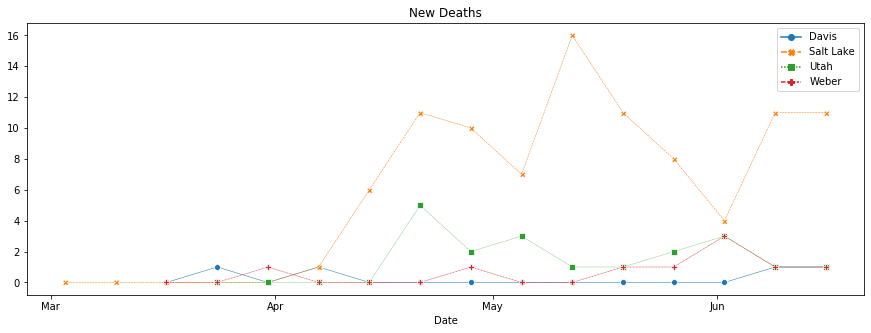

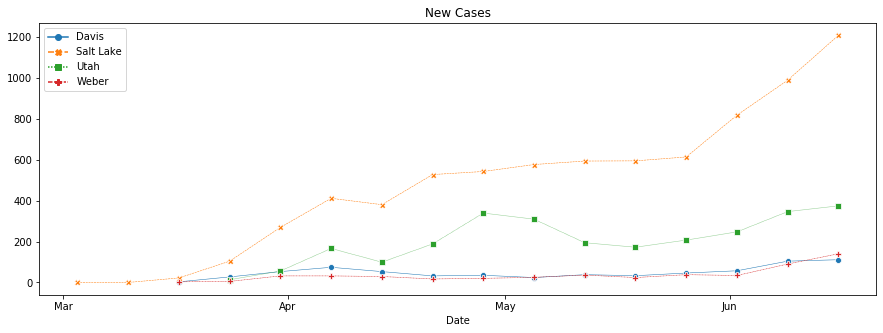

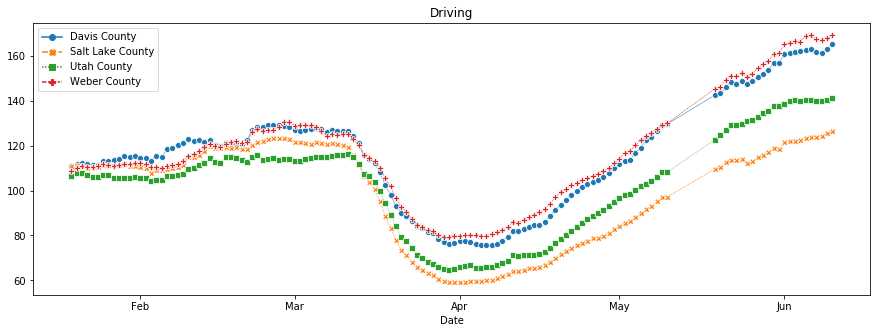

In [93]:
countyDashBoard(["Salt Lake","Utah","Davis","Weber"],state="Utah")

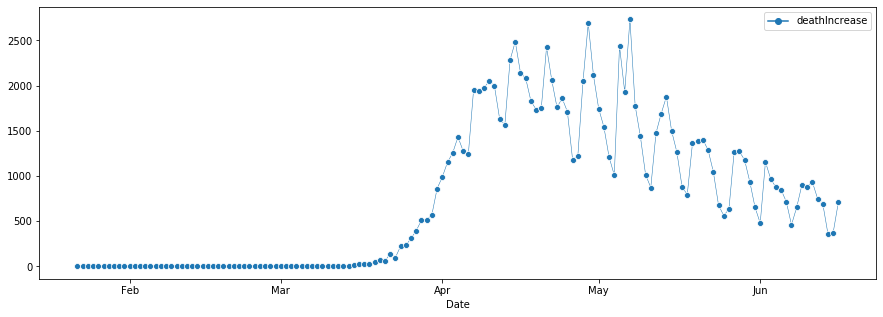

In [94]:
#theatlantic.deathIncrease.plot()
temp = myplot(theatlantic[["deathIncrease"]])

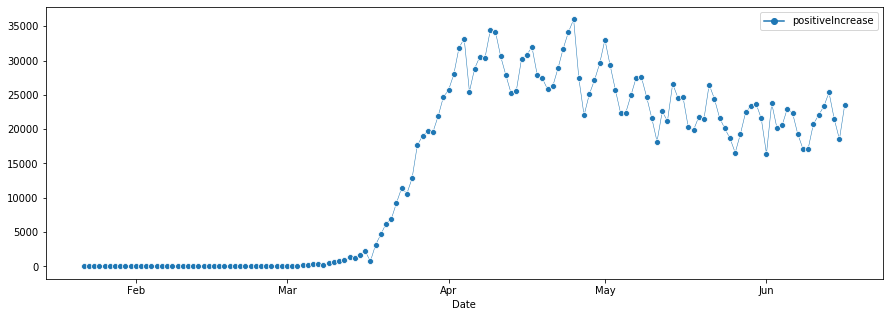

In [95]:
#theatlantic.deathIncrease.plot()
temp = myplot(theatlantic[["positiveIncrease"]])

In [96]:
theatlantic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 2020-06-16 to 2020-01-22
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      147 non-null    int64         
 1   states                    147 non-null    int64         
 2   positive                  147 non-null    int64         
 3   negative                  109 non-null    float64       
 4   pending                   105 non-null    float64       
 5   hospitalizedCurrently     92 non-null     float64       
 6   hospitalizedCumulative    88 non-null     float64       
 7   inIcuCurrently            83 non-null     float64       
 8   inIcuCumulative           84 non-null     float64       
 9   onVentilatorCurrently     84 non-null     float64       
 10  onVentilatorCumulative    77 non-null     float64       
 11  recovered                 84 non-null     float64       
 12  dat

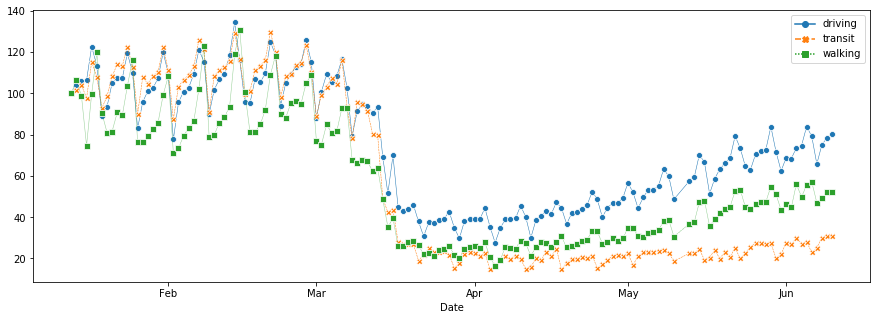

In [97]:
ax = myplot(SanFranMob[['driving','transit','walking']])

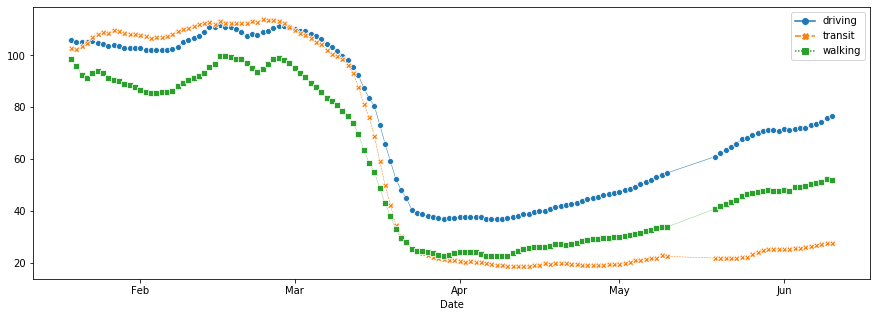

In [98]:
ax = myplot(SanFranMob[['driving','transit','walking']].rolling(7).mean())